In [182]:
pip install snapml


Note: you may need to restart the kernel to use updated packages.


In [183]:
from __future__ import print_function
from tqdm import tqdm

In [184]:
# for ignoring the errors and warnings 
def warn(*args,**kwargs):
    pass 
import warnings 
warnings.warn = warn
warnings.filterwarnings('ignore')

# importings important libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
import time
import warnings 
import gc,sys


In [185]:

sns.set_context('notebook')
sns.set_style('white')

In [186]:
pip install skillsnetwork

Note: you may need to restart the kernel to use updated packages.


In [187]:
df =pd.read_csv('yellow_tripdata_2019-06_1M.csv')


In [188]:
print("There are "+ str(len(df))+" observations in the dataset.")
print("There are "+ str(len(df.columns))+" variables in the dataset")


There are 1000000 observations in the dataset.
There are 19 variables in the dataset


In [189]:
df.shape

(1000000, 19)

In [190]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-06-01 0:55,2019-06-01 0:56,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
1,1,2019-06-01 0:06,2019-06-01 0:06,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5,NaN
2,1,2019-06-01 0:17,2019-06-01 0:36,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0,NaN
3,1,2019-06-01 0:59,2019-06-01 0:59,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0,NaN
4,1,2019-06-01 0:03,2019-06-01 0:15,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5,NaN


In [191]:
df = df[df['tip_amount']>0]

In [192]:
# we also to drop those tip amount which is more  than the fare amount 
df = df[df['tip_amount']<df['fare_amount']]

In [193]:
df.shape


(682480, 19)

In [194]:
df = df.drop(['store_and_fwd_flag','airport_fee'],axis=1)

In [195]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,2019-06-01 0:03,2019-06-01 0:15,1,1.70,1,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2019-06-01 0:28,2019-06-01 0:39,2,1.60,1,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,2019-06-01 0:54,2019-06-01 1:02,2,1.20,1,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,2019-06-01 0:29,2019-06-01 1:03,1,8.60,1,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,2019-06-01 0:01,2019-06-01 0:16,1,1.74,1,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5


In [196]:
data = df.drop(['tip_amount'],axis=1)

In [197]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,2019-06-01 0:03,2019-06-01 0:15,1,1.70,1,113,148,1,9.5,3.0,0.5,0.0,0.3,15.95,2.5
5,1,2019-06-01 0:28,2019-06-01 0:39,2,1.60,1,79,125,1,9.5,3.0,0.5,0.0,0.3,14.30,2.5
7,1,2019-06-01 0:54,2019-06-01 1:02,2,1.20,1,79,249,1,7.5,3.0,0.5,0.0,0.3,12.30,2.5
9,1,2019-06-01 0:29,2019-06-01 1:03,1,8.60,1,186,243,1,31.5,3.0,0.5,0.0,0.3,42.35,2.5
10,2,2019-06-01 0:01,2019-06-01 0:16,1,1.74,1,107,148,1,11.0,0.5,0.5,0.0,0.3,17.76,2.5


In [198]:
data = df.drop(['total_amount'],axis=1)

In [199]:
print(" There are  "+ str(len(data))+" observations in the data")
print(" There are "+ str(len(data.columns))+" variables in the data ")

 There are  682480 observations in the data
 There are 16 variables in the data 


In [200]:
import matplotlib.pyplot as plt

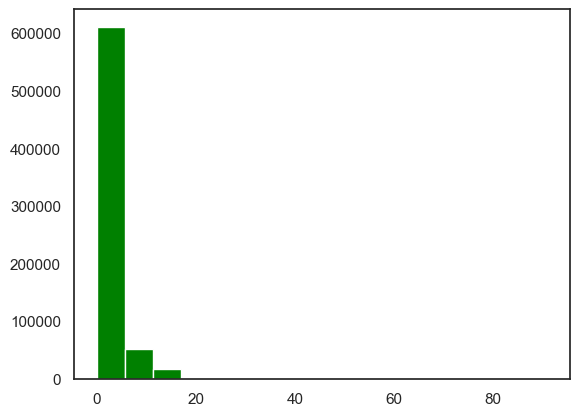

In [201]:
# graphical interpretation of the data 
plt.hist(data.tip_amount.values ,16,histtype='bar' ,facecolor = 'g')
plt.show()

In [202]:
# checking minimum and maximum and the values of tip amount for 90% data 
print(" The minimum amount value ", np.min(data.tip_amount.values))
print (" The maximum amount value ",np.max(data.tip_amount.values))
print(" 90% of the trips have a tip amount less or equal than  ",np.percentile(data.tip_amount.values,90))

 The minimum amount value  0.01
 The maximum amount value  91.0
 90% of the trips have a tip amount less or equal than   5.89


In [203]:
print(np.mean(data.tip_amount.values))
data.head()

3.2041840200445444


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 0:03,2019-06-01 0:15,1,1.70,1,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 0:28,2019-06-01 0:39,2,1.60,1,79,125,1,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 0:54,2019-06-01 1:02,2,1.20,1,79,249,1,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 0:29,2019-06-01 1:03,1,8.60,1,186,243,1,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 0:01,2019-06-01 0:16,1,1.74,1,107,148,1,11.0,0.5,0.5,2.96,0.0,0.3,2.5


 Data preprocessing

 In this subsection we prepare data for training by extracting the useful features

In [204]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])
# extrcting pickup and dropoff hour
data['pickup_hour']= data['tpep_pickup_datetime'].dt.hour
data['dropoff_hour']=data['tpep_dropoff_datetime'].dt.hour

#extracting pickup and dropoff day of week
data['pickup_day']=data['tpep_pickup_datetime'].dt.weekday
data['dropoff_day']=data['tpep_dropoff_datetime'].dt.weekday


# computing the trip time 
data['trip_time']=(data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']).astype('timedelta64[m]')


In [205]:
data= data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)

In [206]:
get_dummy_col = ["VendorID","RatecodeID","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
proc_data = pd.get_dummies(data, columns = get_dummy_col)

In [207]:
proc_data.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,...,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_0,dropoff_day_1,dropoff_day_2,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
4,1,1.70,9.5,3.0,0.5,2.65,0.0,0.3,2.5,12.0,...,0,1,0,0,0,0,0,0,1,0
5,2,1.60,9.5,3.0,0.5,1.00,0.0,0.3,2.5,11.0,...,0,1,0,0,0,0,0,0,1,0
7,2,1.20,7.5,3.0,0.5,1.00,0.0,0.3,2.5,8.0,...,0,1,0,0,0,0,0,0,1,0
9,1,8.60,31.5,3.0,0.5,7.05,0.0,0.3,2.5,34.0,...,0,1,0,0,0,0,0,0,1,0
10,1,1.74,11.0,0.5,0.5,2.96,0.0,0.3,2.5,15.0,...,0,1,0,0,0,0,0,0,1,0


In [208]:
del df
del data
gc.collect()

3996

In [209]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682480 entries, 4 to 999997
Columns: 562 entries, passenger_count to dropoff_day_6
dtypes: float64(9), int64(1), uint8(552)
memory usage: 416.6 MB


extract the labels of the dataframe

In [210]:
y = proc_data[['tip_amount']].values

# now we will drop the column of tip amount as it is required for test the model
proc_data = proc_data.drop(['tip_amount'],axis=1)

In [211]:
# now we will tarin our model using proc_data 
X= proc_data.values

In [212]:
# Normalize the feature matrix 
#Normalization can be useful for handling outliers or extreme values in a dataset. By scaling the values to a specific range, 
#outliers are less likely to have a disproportionate impact on the analysis or modeling process.
normalizer = Normalizer(norm='l1').fit(X)
X = normalizer.transform(X)

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (682480, 561) y.shape= (682480, 1)


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (477736, 561) Y_train.shape= (477736, 1)
X_test.shape= (204744, 561) Y_test.shape= (204744, 1)


In [216]:
from sklearn.tree import DecisionTreeRegressor

In [217]:
sklearn_dt = DecisionTreeRegressor(max_depth=8, random_state=35)

In [218]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  51.24917


In [219]:
from snapml import DecisionTreeRegressor

In [220]:
snapml_dt = DecisionTreeRegressor(max_depth=8, random_state=45, n_jobs=2)

In [221]:
t0 = time.time()
snapml_dt.fit(X_train, y_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  8.71305


In [222]:
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : 5.88x 


In [223]:
sklearn_pred = sklearn_dt.predict(X_test)

In [224]:
snapml_pred = snapml_dt.predict(X_test)

In [225]:
snapml_mse = mean_squared_error(y_test, snapml_pred)
print('[Snap ML] MSE score : {0:.3f}'.format(snapml_mse))

[Snap ML] MSE score : 1.713
